In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',FutureWarning)

In [2]:
#import the dataset
Monthly_acc = pd.read_csv('MonthlyAccidents.csv', index_col=[0],parse_dates=[0])


In [3]:
#check the size of the dataframe
Monthly_acc.size

53

In [4]:
#get statistical summary of the dataframe
Monthly_acc.describe()

,Accidents
count,53.000000
mean,66294.660377
std,22297.086497
min,985.000000
25%,55680.000000
50%,71569.000000
75%,79276.000000
max,106817.000000


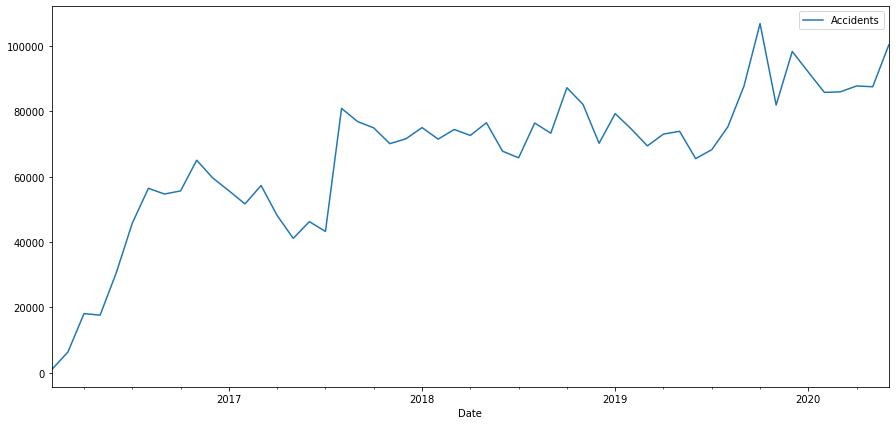

In [5]:
#plot the dataframe to see if there is a trend
Monthly_acc.plot(figsize=(15,7))
plt.show()

#### From the above, we can observe that there is seasonality associated with the data

## ARIMA Model

In [6]:
# Test for Stationarity
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(Monthly_acc.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -2.785536
p-value: 0.060370


##### From the above, we can conclude that the data is non-stationary. Hence, we would need to use the “Integrated (I)” concept, denoted by value ‘d’ in time series to make the data stationary while building the Auto ARIMA model

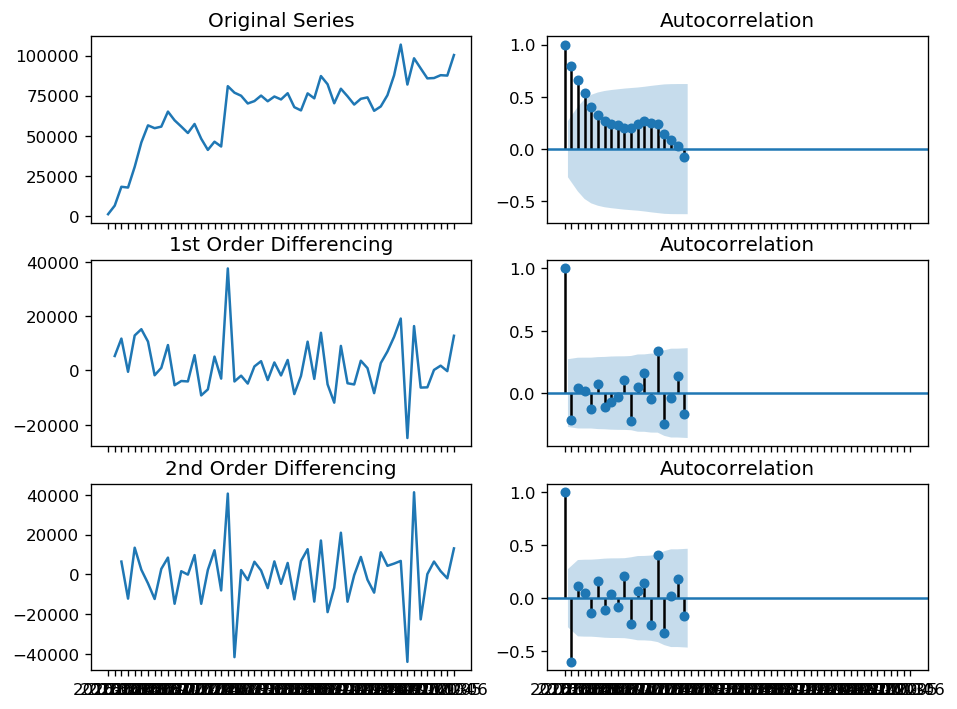

In [7]:
# difference the series and plot the autocorrelation

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Import data
df = pd.read_csv('MonthlyAccidents.csv', names=['value'], header=0)

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df.value); axes[0, 0].set_title('Original Series')
plot_acf(df.value, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df.value.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.value.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df.value.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.value.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

#### d = 1 or 2

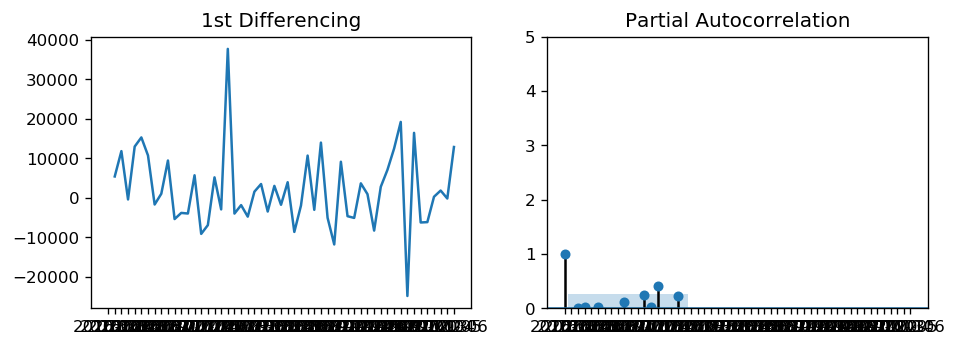

In [8]:
# PACF plot of 1st differenced series to get the value of p

plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.value.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(df.value.diff().dropna(), ax=axes[1])

plt.show()

#### p = 1

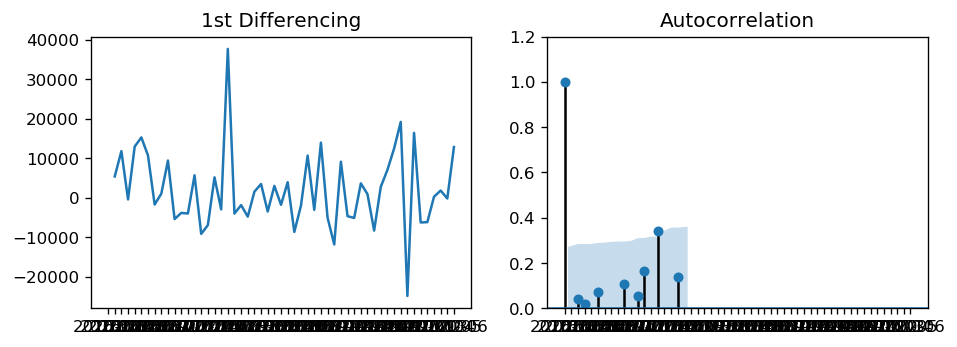

In [10]:
#find q

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.value.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(df.value.diff().dropna(), ax=axes[1])

plt.show()

#### q= 1

In [14]:
# Build ARIMA model 1 (ARIME(p=1, d=1, q=1))

from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


model1 = ARIMA(df.value, order=(1,1,1))
model_fit1 = model1.fit(disp=0)
print(model_fit1.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                   52
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -549.082
Method:                       css-mle   S.D. of innovations           9141.860
Date:                Fri, 29 Jan 2021   AIC                           1106.163
Time:                        12:39:59   BIC                           1113.968
Sample:                    03-01-2016   HQIC                          1109.155
                         - 06-01-2020                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1406.7676    317.007      4.438      0.000     785.445    2028.090
ar.L1.D.value     0.7699      0.113      6.819      0.000       0.549       0.991
ma.L1.D.value    -1.0000      0.066    -

C:\Users\Henry\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Henry\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS wi

In [20]:
# Build ARIMA model  (ARIME(p=1, d=2, q=1))

model2 = ARIMA(df.value, order=(1,2,1))
model_fit2 = model2.fit(disp=0)
print(model_fit2.summary())

                             ARIMA Model Results                              
Dep. Variable:               D2.value   No. Observations:                   51
Model:                 ARIMA(1, 2, 1)   Log Likelihood                -541.258
Method:                       css-mle   S.D. of innovations           9423.116
Date:                Fri, 29 Jan 2021   AIC                           1090.516
Time:                        12:41:06   BIC                           1098.243
Sample:                    04-01-2016   HQIC                          1093.469
                         - 06-01-2020                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -75.4131     72.199     -1.045      0.296    -216.921      66.095
ar.L1.D2.value    -0.2192      0.138     -1.588      0.112      -0.490       0.051
ma.L1.D2.value    -1.0000      0.063

C:\Users\Henry\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Henry\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS wi

#### Model 1 (1,1,1)

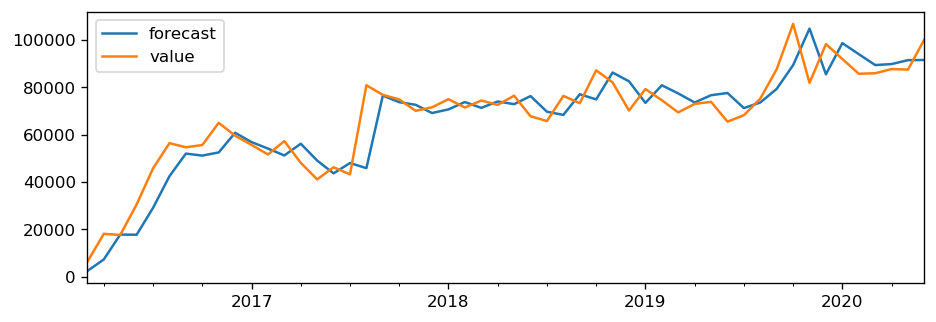

In [21]:
# Actual vs Fitted
model_fit1.plot_predict(dynamic=False)
plt.show()

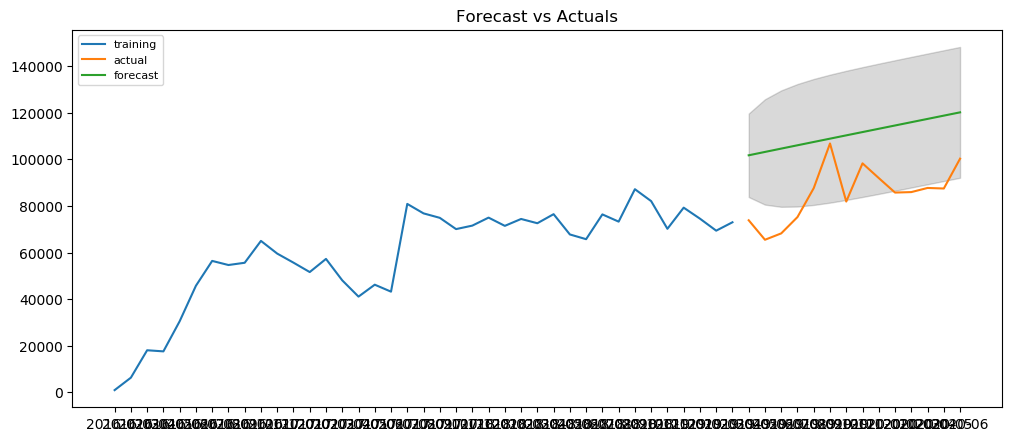

In [22]:
# Create Training and Test
train = df.value[:39]
test = df.value[39:] 

# Forecast
fc, se, conf = model_fit1.forecast(14, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [23]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    #acf1 = acf(fc-test)[1]                      # ACF1
    return({'MAPE':mape, 'ME':me, 'RMSE':rmse, 
            'MinMax':minmax})

forecast_accuracy(fc, test.values)

{'MAPE': 0.316566812507798,
 'ME': 25510.810011487018,
 'RMSE': 27096.830466575535,
 'MinMax': 0.2311837245105164}

#### Model 2 (1,2,1)

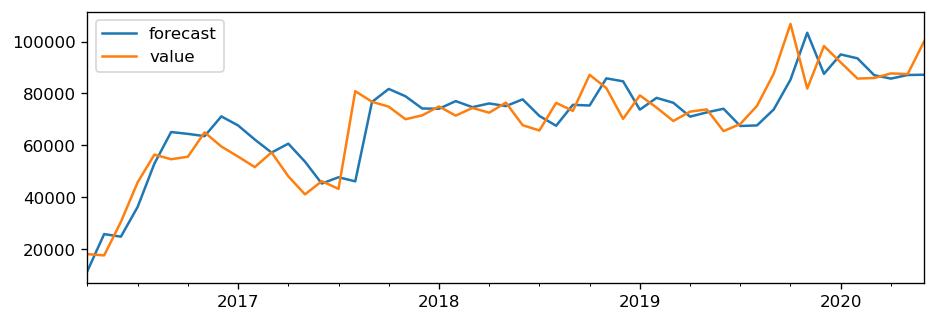

In [24]:
# Actual vs Fitted
model_fit2.plot_predict(dynamic=False)
plt.show()

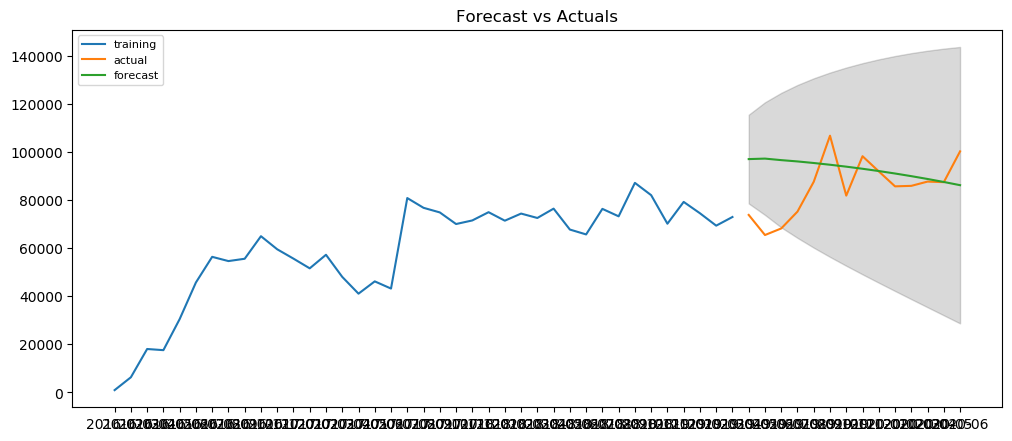

In [25]:
# Create Training and Test
train = df.value[:39]
test = df.value[39:] 

# Forecast
fc, se, conf = model_fit2.forecast(14, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [26]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    #acf1 = acf(fc-test)[1]                      # ACF1
    return({'MAPE':mape, 'ME':me, 'RMSE':rmse, 
            'Min-Max':minmax})

forecast_accuracy(fc, test.values)

{'MAPE': 0.1542841643760644,
 'ME': 7390.769266869097,
 'RMSE': 15619.651806266816,
 'Min-Max': 0.12224896798377383}

In [27]:
acc_forecast = model_fit2.forecast(steps=14)[0]

In [28]:
acc_forecast_df = pd.DataFrame(acc_forecast, index=test.index)

In [29]:
acc_forecast_df.rename(columns={0:'Predictions'},inplace=True)

In [35]:
acc_forecast

array([97083.12734549, 97290.15638135, 96655.48780639, 96113.40010348,
       95459.06963206, 94737.4002666 , 93938.54764571, 93064.66996736,
       92115.29408573, 91090.52372947, 89990.33615795, 88814.73635664,
       87563.72323258, 86237.29702537])

## Auto ARIMA

In [79]:
# Importing auto_arima 
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

arima_m = auto_arima(train,start_p=0, d=1, start_q=0, max_p=3, max_d=3, max_q=3,
                     start_P=0, D=1, start_Q=0, max_P=3, max_D=3, max_Q=3, m=12,
                     seasonal=True, stepwise=True, suppress_warnings=True,error_action='warn',
                     trace=True,random_state=20, n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=563.231, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=561.306, Time=0.06 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.19 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=564.575, Time=0.02 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=560.229, Time=0.16 sec
 ARIMA(1,1,0)(3,1,0)[12]             : AIC=562.222, Time=0.31 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=562.222, Time=0.23 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=561.220, Time=0.09 sec
 ARIMA(1,1,0)(3,1,1)[12]             : AIC=564.224, Time=0.31 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=23645908326455.328, Time=0.13 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=560.269, Time=0.22 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=559.722, Time=0.25 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=562.134, Time=0.09 sec
 ARIMA(1,1,1)(3,1,0)[12]             : AIC=561.719, Time=0.45 sec
 ARIMA(1,1,1)(2,1,1)[12]  

In [80]:

train = Monthly_acc[0:39] 
test = Monthly_acc[39:]

In [81]:
predictn = pd.DataFrame(arima_m.predict(n_periods = 14), index=test.index)
predictn.columns =['prediction']
predictn

,prediction
Date,
2019-05-01,70336.388003
2019-06-01,71206.534327
2019-07-01,74730.844208
2019-08-01,88332.860604
2019-09-01,83615.229770
2019-10-01,86729.295535
2019-11-01,86152.881910
2019-12-01,77606.204996
2020-01-01,77755.801392


In [82]:

test_df= test

test_prediction= test_df.join(predictn, on='Date')
test_prediction

,Accidents,prediction
Date,,
2019-05-01,73864,70336.388003
2019-06-01,65501,71206.534327
2019-07-01,68234,74730.844208
2019-08-01,75246,88332.860604
2019-09-01,87659,83615.229770
2019-10-01,106817,86729.295535
2019-11-01,81894,86152.881910
2019-12-01,98281,77606.204996
2020-01-01,91969,77755.801392


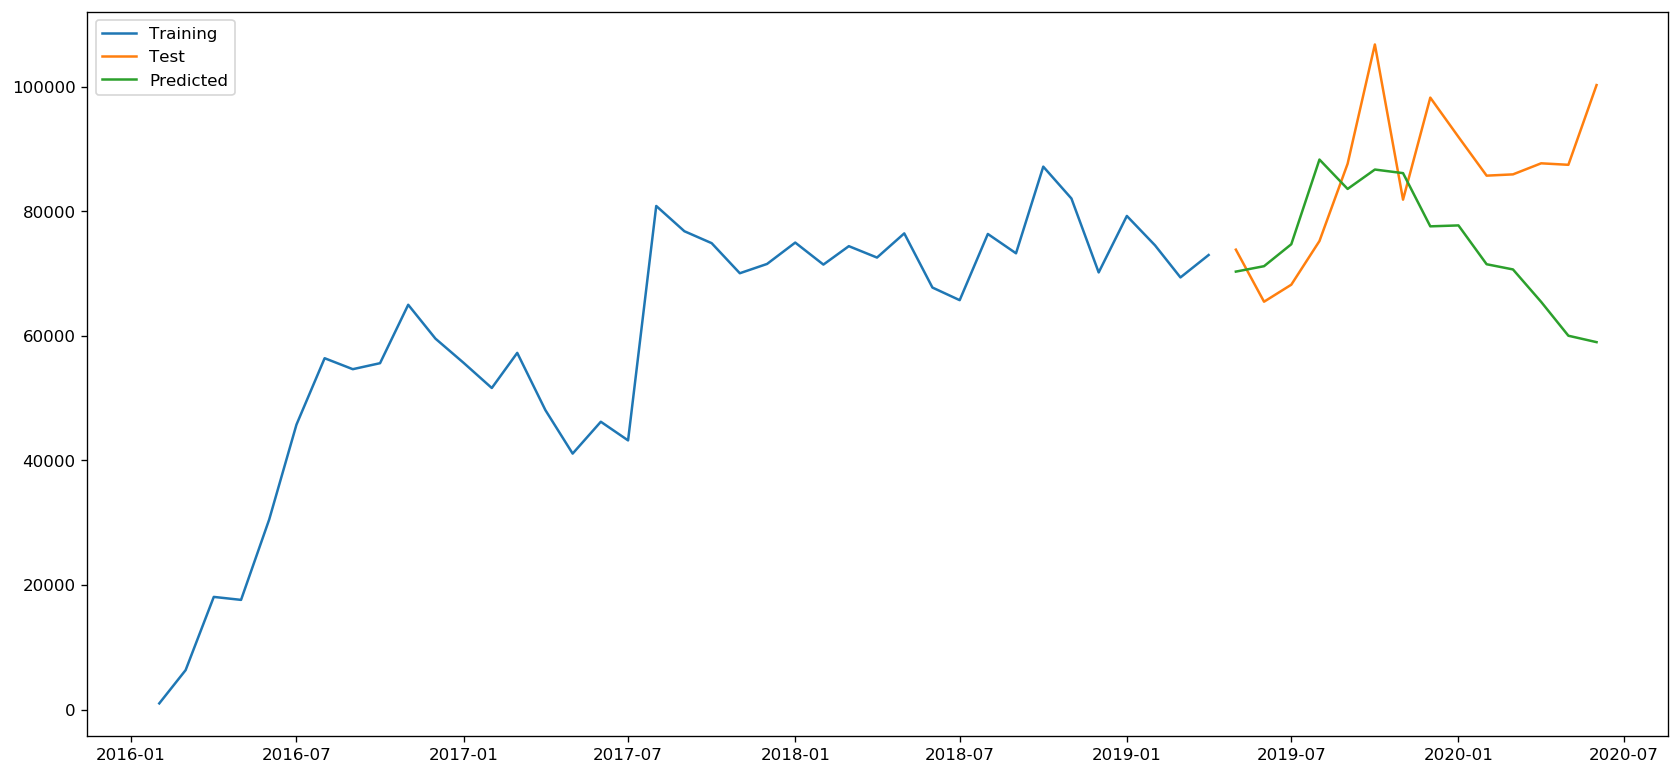

In [83]:
plt.figure(figsize=(17,8))
plt.plot(train,label="Training")
plt.plot(test,label="Test")
plt.plot(predictn,label="Predicted")
plt.legend(loc = 'upper left')
plt.show()